**Tugas Dbimbing**

Nama : Mohammad Ilham

Github : [Mohammad ilham](https://github.com/ilhamsaang)

LinkedIn : [Mohammad Ilham](https://www.linkedin.com/feed/)

Google Drive : [Dokumentasi & Berkas](https://drive.google.com/drive/folders/1LQgxu8HvSqWXSZC7FzsienwcnvaW4xUP?usp=sharing)


**Tujuan** : Mencari Persebaran Lowongan kerja sebagai Data Analyst berdasarkan lokasi perusahaan berdasarkan Website [Jobstreet](https://id.jobstreet.com/)

**<Span style="Color: Yellow">Step 1 : Installasi Library</Span>**

In [ ]:
%pip install selenium beautifulsoup4 pandas webdriver-manager

> <span style="Color:red;">__!pip install selenium beautifulsoup4 pandas webdriver-manager__</span>

Kode ini bertujuan untuk melakukan installasi library yang diperlukan seperti:

__Selenium :__
Library ini bertujuan untuk melakukan automasi interaksi pada elemen web dalam melakukan web scraping, sebab pada website jobstreet terdapat banyak jobcard dan pagingnation untuk melihat lebih banyak lagi jobcard yang ada.

__Beautifulsoup4 :__
Library Python ini digunakan untuk mengekstrak data dari file HTML dan XML, penggunaan library ini digunakan untuk mencari Tag HTML (misalnya div, a, p), atribut (misalnya class, id, href), atau teks di lain dalamnya untuk melakukan interaksi elemen web menggunakan selenium.

__pandas :__
Library Python  untuk analisis dan manipulasi data. Library ini digunakan untuk melakukan export/import data dari berbagai format seperti CSV, Excel, SQL database, JSON, HTML, dan lainnya. selain itu, digunakan juga untuk melakukan data cleansing atau pembersihan data yang terduplikasi ataupun missing value, serta melakukan analisis data untuk mengetahui keterkaitan antar data dalam memprediksi apa yang diinginkan.

__Webdriver-manager :__
Library Python yang dirancang untuk menyederhanakan pengelolaan WebDriver (file executable yang diperlukan Selenium untuk berinterinteraksi dengan browser).

**<Span style="Color: Yellow">Step 2: lakukan pembaruan pada paket software yang digunakan</Span>**

In [ ]:
!apt-get update
!apt-get install chromium-browser

> <span style="Color:red;">__!apt-get update__</span>

merupakan perintah yang memiliki fungsi utama untuk memperbarui daftar paket yang tersedia dari repositori.

> <span style="Color:red;">__!apt-get install chromium-browser__</span>

Setelah daftar paket diperbarui, perintah !apt-get install chromium-browser (atau sudo apt-get install chromium-browser di terminal) berfungsi untuk menginstal paket software chromium-browser dan semua dependensinya ke sistem.

**<Span style="Color: Yellow">Step 3: Data Scraping</Span>**

In [2]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import time
import os
import re

<pre lang="markdown" style="background-color:grey; color:lightgreen">
from selenium import webdriver
</pre>

fungsi : Mengimpor modul webdriver dari Selenium.

tujuan : Digunakan untuk mengontrol browser secara otomatis.

<pre lang="markdown" style="background-color:grey; color:lightgreen">
from selenium.webdriver.chrome.options import Options
</pre>

fungsi : Untuk mengatur opsi khusus pada Chrome

tujuan : mengatur mode headless (tanpa GUI)/ tidak menampilkan proses automatisasi, menyetel user-agent, dll.

<pre lang="markdown" style="background-color:grey; color:lightgreen">
from selenium.webdriver.chrome.service import Service
</pre>

fungsi : Digunakan untuk menyediakan service backend agar ChromeDriver bisa berjalan.

tujuan : Dipakai bersama dengan WebDriverManager.

<pre lang="markdown" style="background-color:grey; color:lightgreen">
from selenium.webdriver.common.by import By
</pre>

fungsi : Memungkinkan pencarian elemen halaman website.

tujuan : pencarian elemen di halaman dengan cara seperti: By.ID, By.CLASS_NAME, By.XPATH, dll.

<pre lang="markdown" style="background-color:grey; color:lightgreen">
from webdriver_manager.chrome import ChromeDriverManager
</pre>

fungsi : Mengelola dan mengunduh versi terbaru ChromeDriver secara otomatis, tanpa perlu setup manual.

tujuan : Sangat berguna agar versi driver cocok dengan versi Chrome di komputer.

<pre lang="markdown" style="background-color:grey; color:lightgreen">
from bs4 import BeautifulSoup
</pre>

fungsi : Mengimpor BeautifulSoup, library untuk parsing HTML/XML.

tujuan : digunakan setelah halaman dimuat dengan Selenium → untuk ekstraksi data spesifik (judul, deskripsi, harga, dll).

<pre lang="markdown" style="background-color:grey; color:lightgreen">
import pandas as pd
</pre>

fungsi : Untuk data analysis dan manipulasi data (DataFrame, CSV, dsb)

tujuan : Untuk data analysis dan manipulasi data (DataFrame, CSV) agar bisa di olah datanya untuk melakukan prediksi maupun mencari kesimpulan berdasarkan data

<pre lang="markdown" style="background-color:grey; color:lightgreen">
import matplotlib.pyplot as plt

import seaborn as sns
</pre>
Fungsi:

matplotlib.pyplot : digunakan untuk membuat grafik/visualisasi dasar.

seaborn : library visualisasi yang dibangun di atas matplotlib, tapi tampilannya lebih estetik dan mudah.

Tujuan :

membuat tampilan grafik yang bagus agar data mudah dibaca

<pre lang="markdown" style="background-color:grey; color:lightgreen">
import date time
import time
</pre>

Fungsi : mengatur waktu

Tujuan : Memberikan nama pada file hasil scraping berdasarkan waktu untuk mencegah nama yang sama dan untuk memberi delay/sleep selama scraping (misalnya time.sleep(3) agar website punya waktu untuk load).

<pre lang="markdown" style="background-color:grey; color:lightgreen">
import os
</pre>

Fungsi : Untuk mengakses fungsi sistem file

Tujuan : Membuat direktori, mengecek path, menyimpan file, dll.

<pre lang="markdown" style="background-color:grey; color:lightgreen">
import re
</pre>

Fungsi : untuk menemukan, mencocokkan, atau memanipulasi teks dalam string berdasarkan aturan tertentu

Tujuan : Mencocokkan pola dari string, Membersihkan teks

In [237]:

# ================== Fungsi Generate Filename dengan Tanggal & Waktu ===================
def generate_unique_filename(base_name, ext=".csv"):
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = f"{base_name}_{timestamp}{ext}"
    return filename

# ================== Fungsi Konversi Tanggal ke Hari ===================
def convert_posted_date_to_days(posted_text):
    posted_text = posted_text.lower()
    
    number = re.search(r'(\d+)', posted_text)
    if not number:
        return -1  # Tidak ada angka ditemukan
    
    value = int(number.group(1))
    
    if "hari" in posted_text:
        return value
    elif "bulan" in posted_text:
        return value * 30
    elif "jam" in posted_text:
        return 0
    else:
        return -1

# ================== Setup Selenium ===================
options = Options()
options.add_argument("--headless")
options.add_argument("--disable-gpu")
options.add_argument("--window-size=1920,1080")
options.add_argument("--no-sandbox")
#options.add_argument("--disable-dev-shm-usage") #gunakan apabila memakai linux

driver = webdriver.Chrome(options=options)

# ================== Input Keyword ===================
def input_keyword():
    keyword = input("Masukkan Job Position yang ingin dicari (pisahkan dengan spasi): ")
    return keyword
keyword = input_keyword()

# ================== Scraping ===================
base_url = f"https://www.jobstreet.co.id/id/data-analyst-jobs"
jobs = []
max_pages = 2 #banyaknya halaman yang akan dilakukan web scraping

for page in range(1, max_pages + 1):
    if page == 1:
        url = base_url
    else:
        url = f"{base_url}?page={page}"

    print(f"\n🔎 Mengakses halaman {page} : {url}")
    driver.get(url)
    time.sleep(4) #lama waktu tunggu, apabila internet lambat disarankan menambahkan waktu tunggunya

    soup = BeautifulSoup(driver.page_source, "html.parser")
    job_cards = soup.find_all('article', attrs={'data-automation': 'normalJob'})
    print(f"📦 Ditemukan {len(job_cards)} lowongan di halaman ini.")

    if not job_cards:
        print("⚠️ Tidak ada lowongan ditemukan, hentikan scraping.")
        break

    for job in job_cards:
        try:
            JobP_tag = job.find('a', {'data-automation': 'jobTitle'})
            JobPosition = JobP_tag.text.strip() if JobP_tag else "N/A"

            company_tag = job.find('a', {'data-automation': 'jobCompany'})
            company = company_tag.text.strip() if company_tag else "N/A"

            location_tags = job.find_all('a', {'data-automation': 'jobLocation'})
            location = ", ".join([l.text.strip() for l in location_tags]) if location_tags else "N/A"

            link_tag = job.find('a', {'data-automation': 'job-list-item-link-overlay'})
            link = "https://www.jobstreet.co.id" + link_tag['href'] if link_tag else "#"

            # Ambil tanggal posting menggunakan data-automation
            date_tag = job.find('span', {'data-automation': 'jobListingDate'})
            date_text = date_tag.text.strip() if date_tag else "N/A"
            days_since_posted = convert_posted_date_to_days(date_text)

            # Kunjungi halaman detail untuk ambil salary, job type, deskripsi
            driver.get(link)
            time.sleep(3)
            detail_soup = BeautifulSoup(driver.page_source, "html.parser")

            salary_tag = detail_soup.find("span", {"data-automation": "job-detail-salary"})
            salary = salary_tag.text.strip() if salary_tag else "N/A"

            job_type_tag = detail_soup.find("span", {"data-automation": "job-detail-work-type"})
            job_type = job_type_tag.text.strip() if job_type_tag else "N/A"

            desc_tag = detail_soup.find("div", {"data-automation": "jobAdDetails"})
            description = desc_tag.get_text(separator="\n").strip() if desc_tag else "N/A"

            jobs.append({
                "Job Position": JobPosition,
                "Company": company,
                "Location": location,
                "Salary": salary,
                "Job Type": job_type,
                "Days_Since_Posted": days_since_posted,
                "Link": link,
                "Description": description
            })

            print(f"[{len(jobs)}] ✅ {JobPosition} | {company} | {job_type} | {days_since_posted} hari")
            driver.back()
            time.sleep(2)
        except Exception as e:
            print(f"[{len(jobs)}] ❌ Error: {e}")
            driver.back()
            time.sleep(2)
            continue

driver.quit()

# ================== Simpan ke CSV ===================
filename = generate_unique_filename("lowongan_jobstreet_lengkap")
df = pd.DataFrame(jobs)
df.to_csv(filename, index=False, encoding='utf-8-sig')
print(f"\n✅ Selesai! Total {len(jobs)} data disimpan di {filename}")



🔎 Mengakses halaman 1 : https://www.jobstreet.co.id/id/data-analyst-jobs
📦 Ditemukan 32 lowongan di halaman ini.
[1] ✅ D3 for Data Analyst - Production Staff (CODE : PROD DA) | PT Panasonic Gobel Energy Indonesia (PECGI) | Full time | 3 hari
[2] ✅ ADMIN DATA ANALYST | PT Atria Artha Persada | Full time | 2 hari
[3] ✅ Contract & Data Analyst | PT Mineral Alam Abadi (Mineral Alam Abadi Group). | Kontrak/Temporer | 4 hari
[4] ✅ Data Analyst | PT Kalowave Teknologi Indonesia | Full time | 4 hari
[5] ✅ Data Analyst | PT. MAX AUTO INDONESIA | Kontrak/Temporer | 2 hari
[6] ✅ Data Analyst | PT YUXI Jayatama Indonesia | Full time | 4 hari
[7] ✅ Data Analyst | WINOD RITEL INDONESIA | Full time | 5 hari
[8] ✅ Quality Control Data Analyst | PT Kartika Sari Indonesia | Full time | 2 hari
[9] ✅ Master Data Management Intern | Danone Indonesia | Kontrak/Temporer | 2 hari
[10] ✅ IT Database Administrator Analyst | PT Wahana Duta Jaya Rucika | Kontrak/Temporer | 2 hari
[11] ✅ Data Support (Jabar - Ban


<pre lang="markdown" style="background-color:grey; color:lightgreen">
def generate_unique_filename(base_name, ext=".csv"):
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = f"{base_name}_{timestamp}{ext}"
    return filename

</pre>

Fungsi generate_unique_filename ini dibuat untuk menghasilkan nama file yang unik dengan menambahkan waktu data scraping selesai setelah nama file sebagai counter/penghitung.

Tujuannya adalah untuk mencegah file lama tertimpa file baru jika menyimpan data dengan nama yang sama dalam hal ini digunakan format waktu YYYYmmdd_HHMMSS atau dibaca dalam bentuk angka untuk TahunBulanTanggal_JamMenitDetik.

<pre lang="markdown" style="background-color:grey; color:lightgreen">
def convert_posted_date_to_days(posted_text):
    posted_text = posted_text.lower()
    
    number = re.search(r'(\d+)', posted_text)
    if not number:
        return -1  # Tidak ada angka ditemukan
    
    value = int(number.group(1))
    
    if "hari" in posted_text:
        return value
    elif "bulan" in posted_text:
        return value * 30
    elif "jam" in posted_text:
        return 0
    else:
        return -1
</pre>

Fungsi convert_posted_date_to_days ini dirancang untuk mengubah teks yang menunjukkan waktu unggah pada website jobstreet (misalnya, "2 hari lalu", "1 bulan yang lalu") menjadi jumlah hari. 

Tujuannya untuk mendapatkan data waktu dari website dalam format teks dan mengonversinya menjadi angka yang bisa diolah.

<pre lang="markdown" style="background-color:grey; color:lightgreen">
options = Options()
options.add_argument("--headless")
options.add_argument("--disable-gpu")
options.add_argument("--window-size=1920,1080")
options.add_argument("--no-sandbox")
options.add_argument("--disable-dev-shm-usage")
driver = webdriver.Chrome(options=options)
</pre>

options yang Anda berikan adalah pengaturan untuk WebDriver Selenium
- options.add_argument("--headless") : menjalankan browser tanpa antarmuka pengguna grafis (GUI)
- options.add_argument("--disable-gpu") : menonaktifkan penggunaan akselerasi hardware GPU oleh browser. menjalankan browser dengan akselerasi GPU bisa menyebabkan masalah atau crash
- options.add_argument("--window-size=1920,1080") : mengatur ukuran jendela browser menjadi 1920 piksel lebar dan 1080 piksel tinggi
- options.add_argument("--no-sandbox") : menonaktifkan mode sandbox Chrome. Sandbox adalah fitur keamanan penting di Chrome yang mengisolasi proses browser dari sistem operasi, mencegah kode berbahaya memengaruhi sistem, sandbox bisa menyebabkan masalah karena pembatasan izin.
- options.add_argument("--disable-dev-shm-usage") : Argumen ini mengubah cara Chrome menggunakan /dev/shm (Shared Memory) di sistem Linux. Chrome bisa crash atau mengalami perilaku aneh. Dengan argumen ini, Chrome akan menggunakan direktori sementara lain yang lebih stabil, bukan /dev/shm. (<a style="color: yellow">Harap Gunakan apabila menggunakan linux</a>)


<pre lang="markdown" style="background-color:grey; color:lightgreen">
def input_keyword():
    keyword = input("Masukkan angka-angka yang ingin dijumlahkan (pisahkan dengan spasi): ")
    return keyword
keyword = input_keyword()
</pre>

Fungsi input_keyword() adalah sebagai cara sederhana untuk mendapatkan masukan dari pengguna dan mengembalikannya sebagai sebuah string.

Tujuannya untuk dapat mencari beragam job position yang di inginkan

<pre lang="markdown" style="background-color:grey; color:lightgreen">
max_pages = 2
for page in range(1, max_pages + 1):
    ...
</pre>

Fungsinya sebagai perulangan atau looping untuk setiap halaman hasil pencarian berdasarkan keyword agar dapat dilakukan data scraping untuk mengambil data yang di inginkan berdasarkan element website yang sudah dicari menggunakan inspect element.

Tujuannya untuk mendapatkan banyak data dengan melakukan looping pada masing-masing halaman, dalam pengujian dilakukan looping untuk mendapatkan data scraping hanya pada 2 halaman.

<pre lang="markdown" style="background-color:grey; color:lightgreen">
driver.back()
time.sleep(2)
</pre>
Fungsi ini mengembalikan browser ke halaman sebelumnya, seperti tombol "Back" pada browser.

Tujuannya setelah membuka detail lowongan dari daftar lowongandan mengambil datanya berdasarkan element maka akan kembali ke halaman sebelumnya yaitu daftar lowongan dengan pengaturan untuk memberhentikan eksekusi script selama 2 detik agar halaman benar-benar selesai dimuat sebelum script mengambil elemen HTML selanjutnya.

<pre lang="markdown" style="background-color:grey; color:lightgreen">
except Exception as e:
    print(f"[{len(jobs)}] ❌ Error: {e}")
    driver.back()
    time.sleep(2)
    continue
</pre>

fungsinya untuk menangani error yang muncul saat memproses satu lowongan kerja, agar proses tidak berhenti dan tetap lanjut ke item berikutnya.

Tujuannya menampilkan semua jenis error yang didapatkan pada halaman pekerjaan, apabila terjadi eror atau kegagalan dalam membuka halaman detail pekerjaan maka sisa kode akan dilewati dan kembali ke halaman daftar pekerjaan agar bisa melakukan data scraping pada detail lowongan pekerjaan lainnya dengan memberikan waktu sebesar 2 detik untuk sempat dimuat.


<pre lang="markdown" style="background-color:grey; color:lightgreen">
driver.quit()
</pre>

fungsinya untuk menutup browser sepenuhnya dan mengakhiri sesi Selenium WebDriver.

Tujuannya Menutup seluruh jendela/tab browser yang dibuka oleh Selenium dan menghentikan sesi WebDriver sepenuhnya, saat proses webscraping berakhir.

<pre lang="markdown" style="background-color:grey; color:lightgreen">
filename = generate_unique_filename("lowongan_jobstreet_lengkap")
df = pd.DataFrame(jobs)
df.to_csv(filename, index=False, encoding='utf-8-sig')
print(f"\n✅ Selesai! Total {len(jobs)} data disimpan di {filename}")
</pre>

fungsinya untuk nyimpan data menjadi format CSV dengan nama yang unik menggunakan format waktu

tujuannya untuk menyimpan data menjadi CSV dan agar data tidak bertabrakan atau tergantikan dengan data baru apabila dilakukan proses data scraping lain, diperlukan nama file yang unik dalam hal ini menggunakan format waktu yang diambil berdasarkan fungsi definisi generate_unique_filename dan memberikan encoding='utf-8-sig' dilakukan untuk memastikan file csv dapat dibuka dengan baik di excel. 

**<Span style="Color: Yellow">Step 4: Data Description</Span>**

In [3]:
# Ambil semua file CSV yang sesuai pola
files = [f for f in os.listdir('.') if f.startswith('lowongan_jobstreet_lengkap_') and f.endswith('.csv')]

# Fungsi ekstraksi timestamp dari nama file
def extract_timestamp(f):
    match = re.search(r'_(\d{8}_\d{6})', f)  # Contoh: _20250628_234512
    if match:
        return datetime.strptime(match.group(1), "%Y%m%d_%H%M%S")
    return datetime.min

# Ambil file dengan timestamp terbaru
latest_file = max(files, key=extract_timestamp)

print(f"📄 File yang dibaca: {latest_file}")

# Baca file CSV
df = pd.read_csv(latest_file, engine='python')

📄 File yang dibaca: lowongan_jobstreet_lengkap_20250628_234606.csv


<pre lang="markdown" style="background-color:grey; color:lightgreen">
files = [f for f in os.listdir('.') if f.startswith('lowongan_jobstreet_lengkap_') and f.endswith('.csv')]
</pre>

Fungsinya untuk mengambil semua file di direktori/penyimpanan saat ini yang berformat CSV dan diawali dengan kalimat lowongan_jobstreet_lengkap_

Tujuannya mencari File yang sesuai dengan format nama

<pre lang="markdown" style="background-color:grey; color:lightgreen">
def extract_timestamp(f):
    match = re.search(r'_(\d{8}_\d{6})', f)  # Contoh: _20250628_234512
    if match:
        return datetime.strptime(match.group(1), "%Y%m%d_%H%M%S")
    return datetime.min
</pre>

fungsinya mengekstrak timestamp pada nama yang mana menggunakan urutan seperti _(\d{8}_\d{6}),yaitu \d{8}: 8 digit untuk tanggal (YYYYmmdd) dan \d{6}: 6 digit untuk waktu (HHMMSS). jika tidak cocok, kembalikan datetime.min (tanggal sangat lama, agar pasti kalah saat max() dipanggil)

Tujuannya untuk digunakan saat ingin mengolah data dengan format waktu paling baru

<pre lang="markdown" style="background-color:grey; color:lightgreen">
latest_file = max(files, key=extract_timestamp)
print(f"📄 File yang dibaca: {latest_file}")
df = pd.read_csv(latest_file, engine='python')
</pre>

Fungsinya mencari file dengan format waktu paling baru dengan memanfaatkan fungsi definisi extract_timestamp sebagai kunci perbandingan. lalu menampilkan hasil file yang terpilih dan membaca isi file tersebut ke dalam dataframe(df)

tujuannya membaca data terbaru berdasarkan nama file kedalam bentuk dataframe


In [239]:
# Jumlah data (baris dan kolom)
print("Jumlah data (baris, kolom):", df.shape)

Jumlah data (baris, kolom): (64, 8)


untuk menampilkan ukuran dataframe yaitu jumlah baris dan kolom

In [240]:
print("\nInformasi tipe data dan skema pengkodean:")
print(df.info())


Informasi tipe data dan skema pengkodean:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Job Position       64 non-null     object
 1   Company            62 non-null     object
 2   Location           64 non-null     object
 3   Salary             13 non-null     object
 4   Job Type           64 non-null     object
 5   Days_Since_Posted  64 non-null     int64 
 6   Link               64 non-null     object
 7   Description        64 non-null     object
dtypes: int64(1), object(7)
memory usage: 4.1+ KB
None


untuk menampilkan informasi ringkas tentang DataFrame, seperti nama kolom, jumlah non nul perkolom, tipe data tiap kolom dan total penggunaan memory

In [241]:
print("\nStatistik deskriptif untuk data numerik:")
print(df.describe())


Statistik deskriptif untuk data numerik:
       Days_Since_Posted
count          64.000000
mean            8.687500
std             6.937075
min             2.000000
25%             3.000000
50%             5.000000
75%            12.000000
max            26.000000


untuk menampilkan statistik deskriptif dari semua kolom numerik di data frame seperti

- count: jumlah data yang tidak null
- mean: nilai rata-rata
- std: standar deviasi
- min: nilai minimum
- 25% / 50% / 75%: kuartil
- max: nilai maksimum

In [242]:
# Melihat beberapa baris pertama data
print("\nBeberapa baris pertama data:")
print(df.head(5))


Beberapa baris pertama data:
                                        Job Position  \
0  D3 for Data Analyst - Production Staff (CODE :...   
1                                 ADMIN DATA ANALYST   
2                            Contract & Data Analyst   
3                                       Data Analyst   
4                                       Data Analyst   

                                             Company  \
0        PT Panasonic Gobel Energy Indonesia (PECGI)   
1                             PT Atria Artha Persada   
2  PT Mineral Alam Abadi (Mineral Alam Abadi Group).   
3                    PT Kalowave Teknologi Indonesia   
4                             PT. MAX AUTO INDONESIA   

                      Location                                 Salary  \
0         Cibitung, Jawa Barat                                    NaN   
1        Medan, Sumatera Utara  Rp 3.500.000 – Rp 4.000.000 per month   
2  Jakarta Barat, Jakarta Raya                                    NaN   
3  J

untuk menampilkan 5 baris pertama dari data frame sebanyak nilai dari dalam kurung pada fungsi .head

**<Span style="Color: Yellow">Step 5: Data Cleansing</Span>**


Jumlah Nilai Hilang Setiap Kolom (kecuali nilai string seperti 'Not Disclosed'):
Job Position         0
Company              0
Location             0
Salary               0
Job Type             0
Days_Since_Posted    0
Link                 0
Description          0
dtype: int64


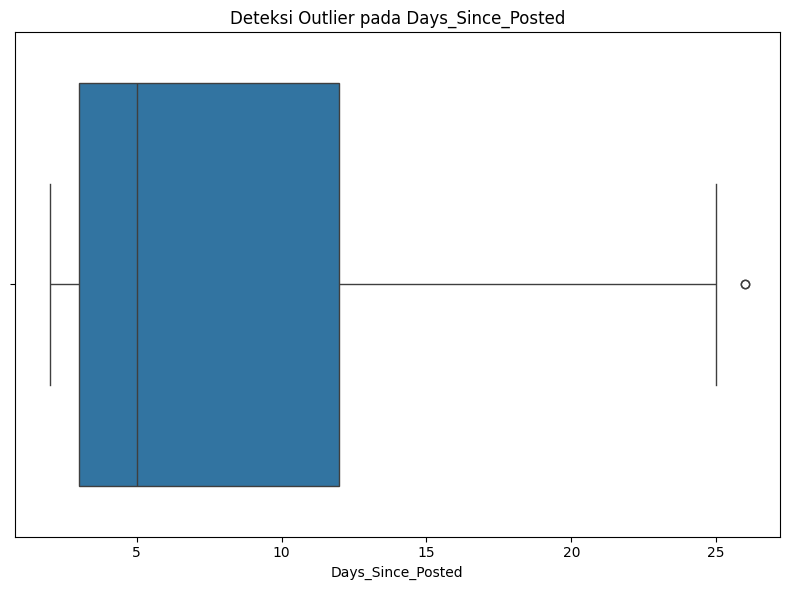

In [ ]:
# Pilih hanya kolom numerik untuk analisis outlier
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

# Cek nilai hilang yang sesungguhnya (bukan string 'Not Disclosed')
missing_values = df.isnull().sum()

print("\nJumlah Nilai Hilang Setiap Kolom (kecuali nilai string seperti 'Not Disclosed'):")
print(missing_values)

# Visualisasi boxplot jika ada fitur numerik
if len(numerical_features) == 0:
    print("\nTidak ada kolom numerik untuk dianalisis outlier.")
else:
    for feature in numerical_features:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=df[feature])
        plt.title(f"Deteksi Outlier pada {feature}")
        plt.tight_layout()
        plt.show()

<pre lang="markdown" style="background-color:grey; color:lightgreen">
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
</pre>

fungsinya memilih semua kolom bertipe numerik (integer dan float) dari dataframe

tujuannya untuk keperluan analisis outlier karena hanya data numerik yang bisa divisualisasikan dengan boxplot

<pre lang="markdown" style="background-color:grey; color:lightgreen">
missing_values = df.isnull().sum()
</pre>

fungsinya untuk mengecek jumlah nilai yang benar-benar kosong (NaN) di semua kolom

tujuannya Ini tidak akan menghitung 'Not Disclosed' sebagai nilai kosong karena itu sudah jadi string biasa

<pre lang="markdown" style="background-color:grey; color:lightgreen">
if len(numerical_features) == 0:
</pre>

fungsinya untuk mengecek adanya kolom numerik

tujuannya untuk memproses kolom numerik pada visualisasi outlier apabila tidak ada maka akan dilewati.

<pre lang="markdown" style="background-color:grey; color:lightgreen">
for feature in numerical_features:
    sns.boxplot(x=df[feature])
</pre>

fungsinya untuk menampilkan setiap kolom numerik pada boxplot.

tujuannya mendeteksi outlier secara visual

### 📈 Interpretasi Boxplot

1. Box (kotak)
    - Menunjukkan rentang antara Q1 (kuartil bawah, 25%) hingga Q3 (kuartil atas, 75%).

    - Garis di dalam kotak adalah median (Q2 / 50%).

    - Dalam plot kamu, median sekitar 5 hari, artinya setengah dari lowongan diposting kurang dari 5 hari yang lalu.

2. Whiskers (garis horizontal)
    - Menunjukkan sebaran data yang masih dianggap normal (maksimal 1,5 IQR dari Q1 dan Q3).

    - Di sini, data tersebar dari sekitar 1 hari hingga 23-24 hari.

3. Titik di luar whiskers (outlier)
    - Titik di sebelah kanan (sekitar 25) adalah outlier, artinya:

    > Ada lowongan yang diposting lebih lama dari kebanyakan data — ini tidak wajar atau jarang terjadi.



In [13]:
# Hitung jumlah nilai hilang sebelum pembersihan
missing_before = df.isna().sum()

# Cleaning:
#Isi nilai hilang
df['Job Position'] = df['Job Position'].fillna('Unknown Job Position')
df['Company'] = df['Company'].fillna('Unknown Company')
df['Location'] = df['Location'].fillna('Unknown Location')
df['Salary'] = df['Salary'].fillna('Not Disclosed')
df['Job Type'] = df['Job Type'].fillna('Unknown Job Type')
df['Days_Since_Posted'] = df['Days_Since_Posted'].fillna('0')
df['Link'] = df['Link'].fillna('Unknown Link')
df['Description'] = df['Description'].fillna('No Description')


# Cek jumlah nilai hilang setiap kolom setelah cleaning
missing_after = df.isna().sum()
print("\nJumlah Nilai Hilang Setiap Kolom sebelum Cleansing:")
print(missing_before)

print("\nJumlah Nilai Hilang Setiap Kolom sesudah Cleansing:")
print(missing_after)



Jumlah Nilai Hilang Setiap Kolom sebelum Cleansing:
Job Position         0
Company              0
Location             0
Salary               0
Job Type             0
Days_Since_Posted    0
Link                 0
Description          0
dtype: int64

Jumlah Nilai Hilang Setiap Kolom sesudah Cleansing:
Job Position         0
Company              0
Location             0
Salary               0
Job Type             0
Days_Since_Posted    0
Link                 0
Description          0
dtype: int64


<pre lang="markdown" style="background-color:grey; color:lightgreen">
missing_before = df.isna().sum()
</pre>

fungsinya untuk menyimpan jumlah nilai kosong di setiap kolom sebelum proses cleaning

tujuannya untuk mendapatkan dan menampilkan data sebelum data di cleaning

<pre lang="markdown" style="background-color:grey; color:lightgreen">
df['Job Position'] = df['Job Position'].fillna('Unknown Job Position')
df['Company'] = df['Company'].fillna('Unknown Company')
df['Location'] = df['Location'].fillna('Unknown Location')
df['Salary'] = df['Salary'].fillna('Not Disclosed')
df['Job Type'] = df['Job Type'].fillna('Unknown Job Type')
df['Days_Since_Posted'] = df['Days_Since_Posted'].fillna(0)
df['Link'] = df['Link'].fillna('Unknown Link')
df['Description'] = df['Description'].fillna('No Description')
</pre>

fungsinya mengisi nilai kosong pada kolom sesuai dengan nilai kolomnya

tujuannya memastikan tidak ada data kosong pada tiap kolom


<pre lang="markdown" style="background-color:grey; color:lightgreen">
missing_after = df.isna().sum()
</pre>

fungsinya menghitung kembali jumlah nilai kosong setelah dilakukan pengisian

Tujuannya untuk mengambil data agar dapat dibandingkan

<pre lang="markdown" style="background-color:grey; color:lightgreen">
print("\nJumlah Nilai Hilang Setiap Kolom sebelum Cleansing:")
print(missing_before)

print("\nJumlah Nilai Hilang Setiap Kolom sesudah Cleansing:")
print(missing_after)
</pre>

Fungsinya menampilkan data sebelum dan sesudah cleansing

tujuannya membandingkan data

In [245]:
# Fungsi cari file dengan timestamp terbaru
def find_latest_timestamped_filename(base_name, ext=".csv"):
    pattern = re.compile(rf"{re.escape(base_name)}_(\d{{8}}_\d{{6}}){re.escape(ext)}")
    latest_time = datetime.min
    latest_file = None

    for filename in os.listdir():
        match = pattern.match(filename)
        if match:
            timestamp_str = match.group(1)
            timestamp = datetime.strptime(timestamp_str, "%Y%m%d_%H%M%S")
            if timestamp > latest_time:
                latest_time = timestamp
                latest_file = filename

    if latest_file:
        return latest_file
    else:
        raise FileNotFoundError(f"Tidak ada file ditemukan dengan pola '{base_name}_YYYYMMDD_HHMMSS{ext}'")

# ================== Load Data ===================
target_file = find_latest_timestamped_filename("lowongan_jobstreet_lengkap")
print(f"🔎 Membaca file: {target_file}")

df = pd.read_csv(target_file, engine='python')

# ================== Cek dan Hapus Duplikat ===================
duplicate_rows = df.duplicated().sum()

if duplicate_rows > 0:
    df = df.drop_duplicates()
    df.to_csv(target_file, index=False, encoding='utf-8-sig')
    print(f"✅ {duplicate_rows} baris duplikat dihapus dan file disimpan kembali ke '{target_file}'")
else:
    print("\n✅ Tidak ada baris data duplikat.")

🔎 Membaca file: lowongan_jobstreet_lengkap_20250628_234606.csv

✅ Tidak ada baris data duplikat.


<pre lang="markdown" style="background-color:grey; color:lightgreen">
def find_latest_timestamped_filename(base_name, ext=".csv"):

pattern = re.compile(rf"{re.escape(base_name)}_(\d{{8}}_\d{{6}}){re.escape(ext)}")

for filename in os.listdir():
    match = pattern.match(filename)
    ...
if latest_file:
    return latest_file
else:
    raise FileNotFoundError(...)
</pre>
fungsi untuk mencari file terbaru berdasarkan timestamp pada nama yang mana menggunakan urutan seperti _(\d{8}_\d{6}),yaitu \d{8}: 8 digit untuk tanggal (YYYYmmdd) dan \d{6}: 6 digit untuk waktu (HHMMSS). jika tidak cocok, ekstrak timestamp dan cari yang paling baru. Jika ketemu file terbaru: dikembalikan, Jika tidak: error akan muncul 

Tujuannya untuk digunakan saat ingin mengolah data dengan format waktu paling baru

<pre lang="markdown" style="background-color:grey; color:lightgreen">
target_file = find_latest_timestamped_filename("lowongan_jobstreet_lengkap")
df = pd.read_csv(target_file, engine='python')
</pre>

Fungsinya mengambil file csv terbaru berdasarkan nama + timestamp

fungsinya membaca file kedalam bentuk dataframe

<pre lang="markdown" style="background-color:grey; color:lightgreen">
duplicate_rows = df.duplicated().sum()

if duplicate_rows > 0:
    df = df.drop_duplicates()
    ...
else:
    print("✅ Tidak ada baris data duplikat.")
</pre>

fungsinya mengecek ada berapa banyak baris yang terduplikasi secara persis pada semua kolom. jika ada maka data pada baris akan dihapus

tujuannya menlakukan pemeriksaan dan menghilangkan adanya data yang terduplikasi


In [215]:
# Menampilkan jumlah nilai unik untuk setiap kolom (untuk memahami kategori)
print("\nJumlah nilai unik untuk setiap kolom:")
for column in df.columns:
  print(f"{column}: {df[column].nunique()}")


Jumlah nilai unik untuk setiap kolom:
Job Position: 49
Company: 57
Location: 20
Salary: 11
Job Type: 2
Days_Since_Posted: 17
Link: 64
Description: 61
Provinsi: 6
NumericSalary: 8


<pre lang="markdown" style="background-color:grey; color:lightgreen">
print("\nJumlah nilai unik untuk setiap kolom:")
for column in df.columns:
  print(f"{column}: {df[column].nunique()}")
</pre>

fungsinya melakukan looping terhadap setiap nilai kolom pada dataframe dan menghitung nilai uniknya kemudian mencetaknya untuk diperlihatkan hasilnya

tujuannya mengetahui jumlah nilai unik disetiap kolom

**<Span style="Color: Yellow">Step 6: Data Eksploration</Span>**

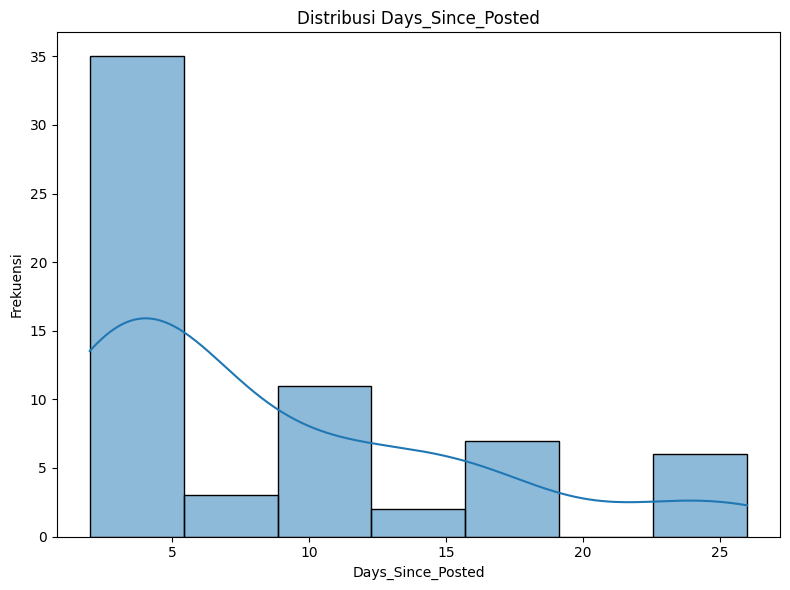

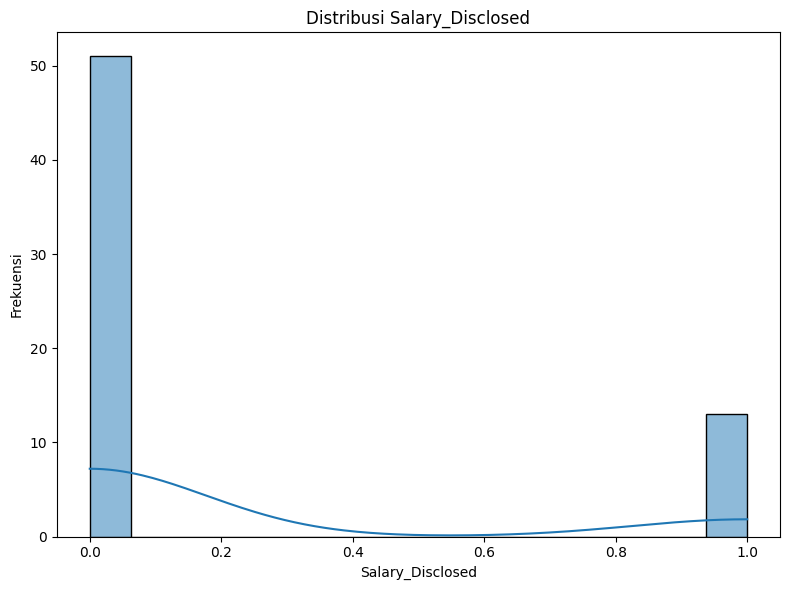

In [25]:
numerical_features = df.select_dtypes(include=['number']).columns

for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[feature], kde=True)
    plt.title(f"Distribusi {feature}")
    plt.xlabel(feature)
    plt.ylabel('Frekuensi')
    plt.tight_layout()
    plt.show()

<pre lang="markdown" style="background-color:grey; color:lightgreen">
numerical_features = df.select_dtypes(include=['number']).columns

for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[feature], kde=True)
    plt.title(f"Distribusi {feature}")
    plt.xlabel(feature)
    plt.ylabel('Frekuensi')
    plt.tight_layout()
    plt.show()
</pre>

Fungsinya menampilkan histogram distribusi dnegan kurva KDE (Density Estimation) dengan menambahkan kurva halus diatas histogram dapat memudahkan analisis distribusi serta merapikan jarak elemen plot

tujuannya mengetahui apakah distribusi data numerik normal atau tidak, hal ini penting untuk pra pemrosesan data, seperti scaling, transformasi log dll pada data numerik

### __Hasil data__

Histogram Distribuso Days_Since_Posted menunjukan hasil bahwa belakangan ini lowongan data analyst meningkat hal ini dibuktikan bahwa banyaknya data lowongan yang dibuka 5 hari belakangan ini lebih banyak

Histogram distribusi salary_disclosed menunjukkan hasil bahwa banyaknya loker yang tidak menyebutkan nominal salary atau gaji untuk posisi yang dibuka

In [4]:
# Hitung jumlah lowongan berdasarkan perusahaan
perusahaan_counts = df['Company'].value_counts()

# Hitung jumlah lowongan berdasarkan lokasi
lokasi_counts = df['Location'].value_counts()

# Hitung jumlah lowongan berdasarkan perusahaan
salary_counts = df['Salary'].value_counts()

# Hitung jumlah lowongan berdasarkan perusahaan
JobType_counts = df['Job Type'].value_counts()
# Hitung jumlah lowongan berdasarkan waktu pencarian
date_counts = df['Days_Since_Posted'].value_counts()

# merubah lokasi kota menjadi provinsi
df['Provinsi'] = df['Location'].apply(lambda x: x.split(',')[-1].strip() if pd.notnull(x) else x)

Fungsinya untuk mendeklarasikan variabel agar dapat melakukan analysis lebih lanjut pada setiap data berdasarkan kolomnya yang ingin dicari keterhubungannya

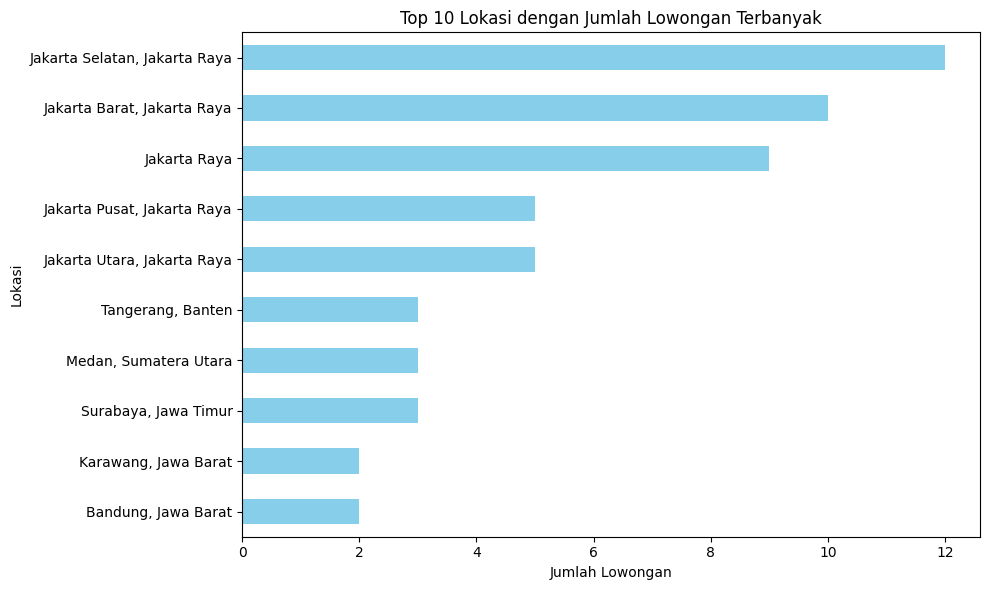

In [24]:
plt.figure(figsize=(10, 6))
lokasi_counts = df['Location'].value_counts()
lokasi_counts.head(10).plot(kind='barh', color='skyblue')
plt.title("Top 10 Lokasi dengan Jumlah Lowongan Terbanyak")
plt.xlabel("Jumlah Lowongan")
plt.ylabel("Lokasi")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

<pre lang="markdown" style="background-color:grey; color:lightgreen">
plt.figure(figsize=(10, 6))
lokasi_counts = df['Location'].value_counts()
lokasi_counts.head(10).plot(kind='barh', color='skyblue')
plt.title("Top 10 Lokasi dengan Jumlah Lowongan Terbanyak")
plt.xlabel("Jumlah Lowongan")
plt.ylabel("Lokasi")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
</pre>

menampiklan top 10 perusahaan berdasarkan dataframe lokasi dan jumlah lowongan yang dibuka

kendala: terdapat data yang hanya mencantumkan lokasi berupa nama provinsinya saja

solusi: mengubah pemetaan berdasarkan provinsi

### __Hasil Data__

- Lokasi seperti Jakarta Selatan, Jakarta Barat, Jakarta Pusat, dsb. memiliki jumlah lowongan terbanyak.

- Dominasi DKI Jakarta terlihat sangat kuat, yang umum terjadi karena menjadi pusat bisnis dan industri.

### __Manfaat__

- menentukan lokasi strategis untuk pencari kerja atau perekrut
- memetakan konsentrasi lowongan
- menemukan tren urbanisasi pekerjaan

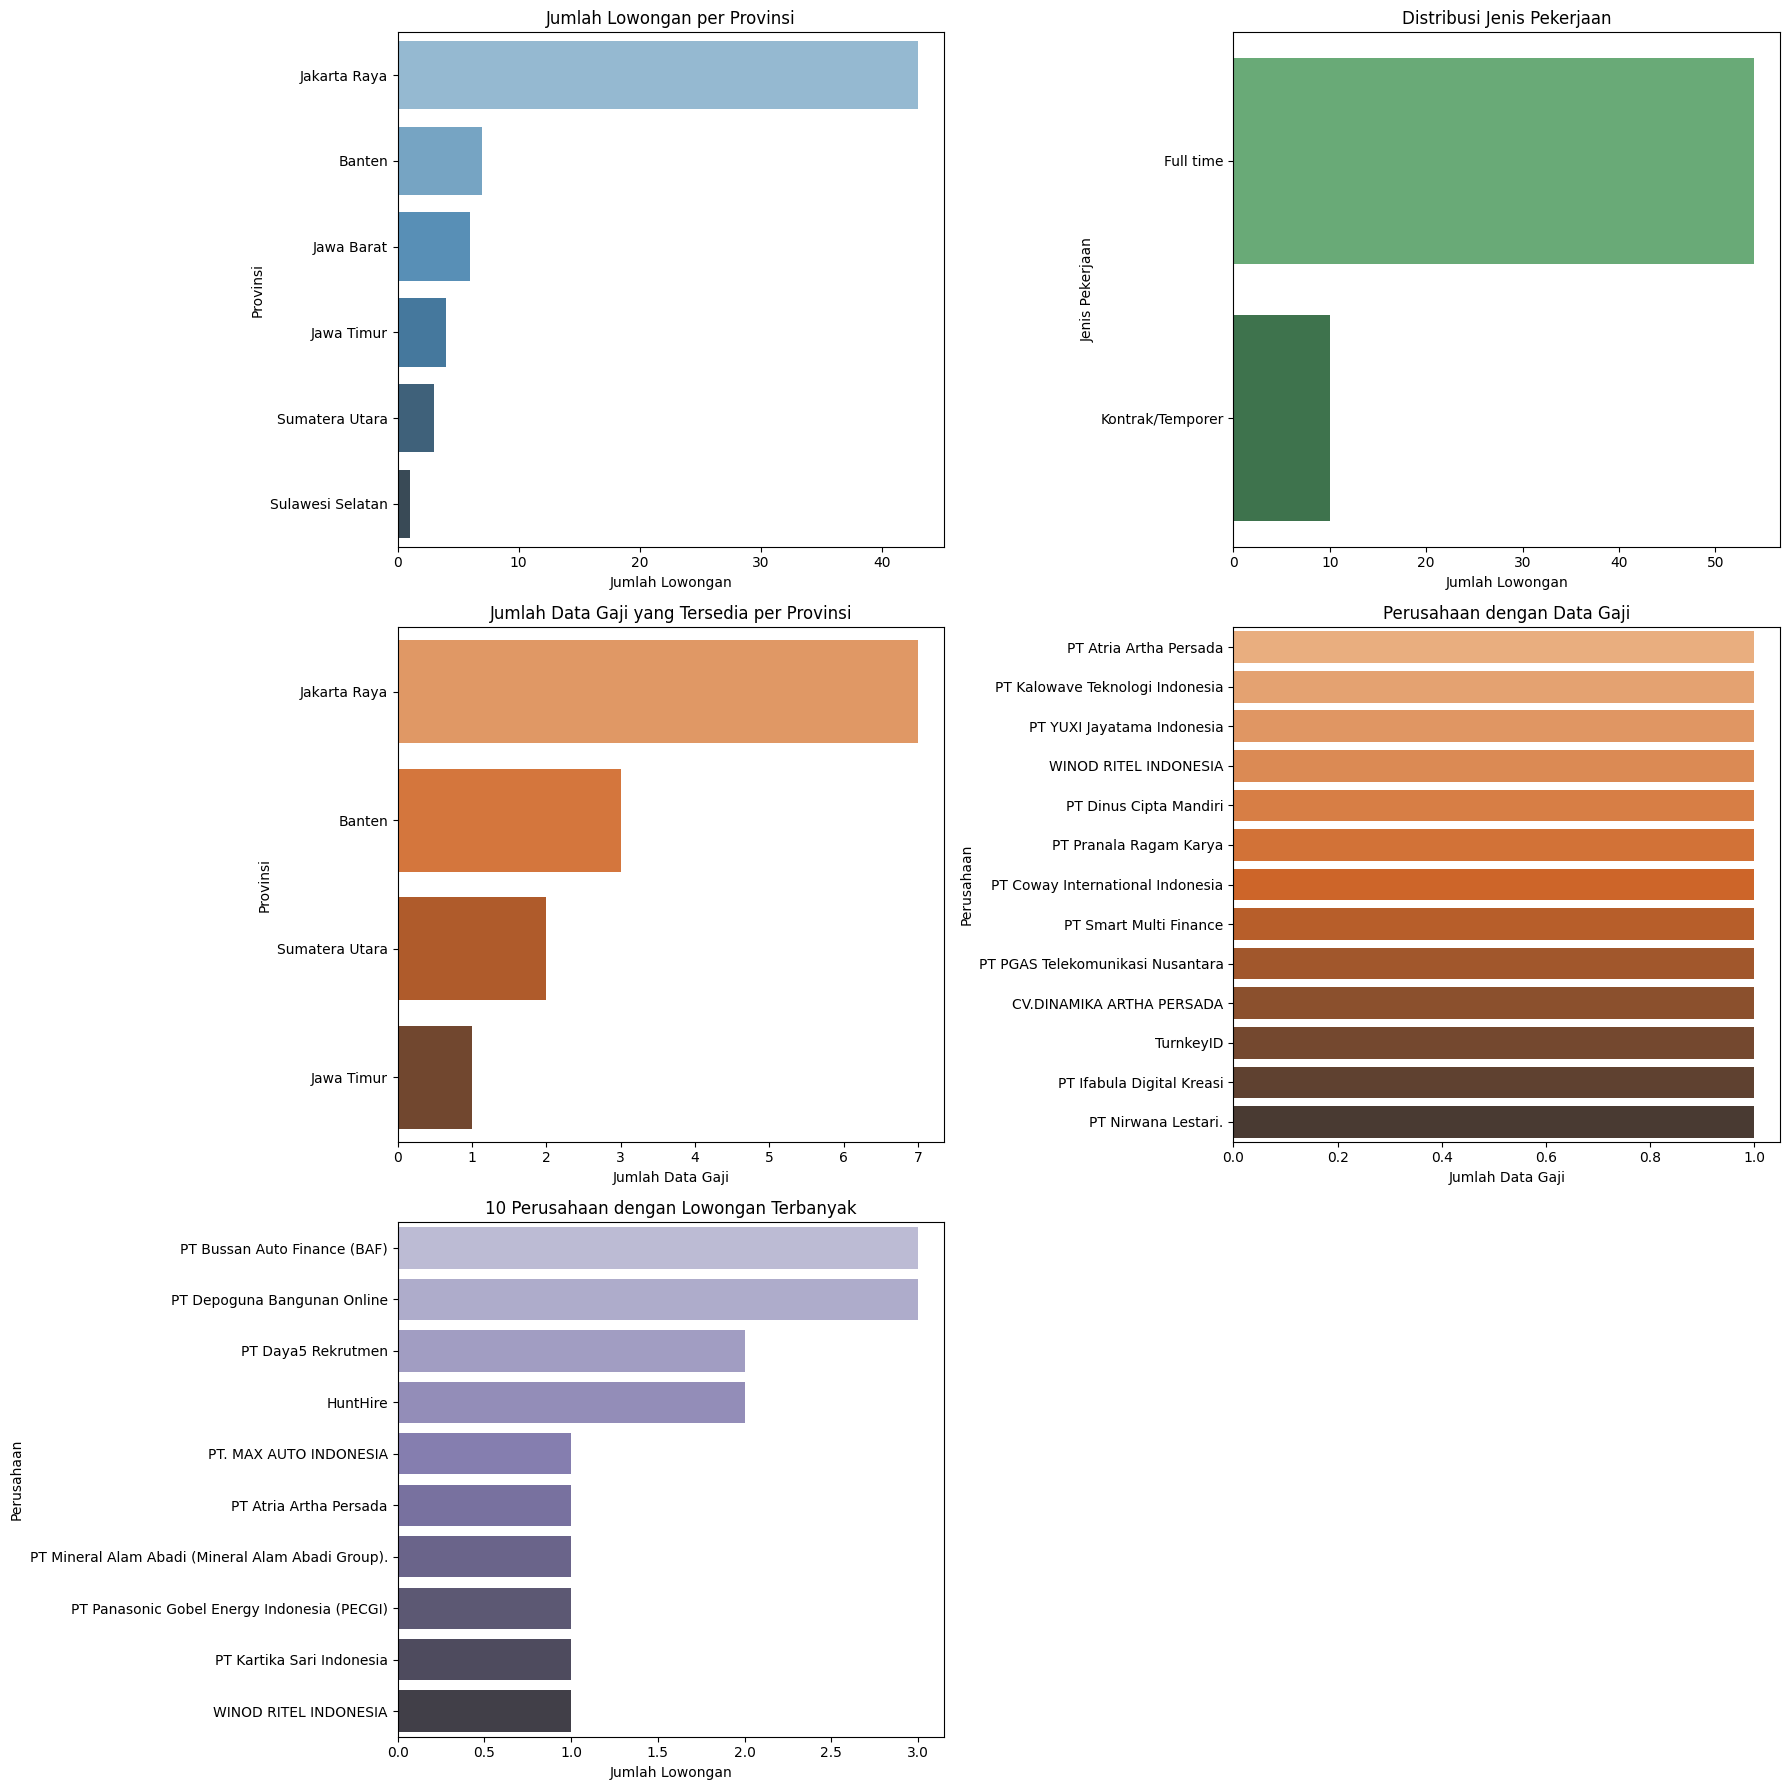

In [5]:
# Jumlah lowongan per provinsi
lowongan_per_provinsi = df['Provinsi'].value_counts()

# Distribusi jenis pekerjaan
job_type_counts = df['Job Type'].value_counts()

# Salin data Salary yang tidak null
salary_raw = df[['Salary']].dropna().copy()

# Fungsi untuk membersihkan dan ekstrak angka minimum dari rentang
def clean_salary(s):
    # Hapus simbol & format
    s = s.replace('Rp', '').replace('.', '').replace(',', '').replace('\xa0', ' ')
    numbers = re.findall(r'\d+', s)
    return int(numbers[0]) if numbers else None

# Terapkan fungsi ke seluruh kolom Salary
df['NumericSalary'] = df['Salary'].apply(lambda x: clean_salary(x) if pd.notna(x) else None)

# Hitung hanya yang berhasil dikonversi ke numerik
numeric_salary_count = df['NumericSalary'].notna().sum()

salary_numeric = df.dropna(subset=['NumericSalary']).copy()

# Jumlah entri gaji yang tersedia per provinsi (hanya data yang memiliki nilai gaji)
salary_data = df[['Provinsi', 'Salary']].dropna()
salary_count_per_provinsi = salary_numeric['Provinsi'].value_counts()

# Perusahaan dengan jumlah lowongan terbanyak (top 10)
company_counts = df['Company'].value_counts().dropna().head(10)
provinsi_df = lowongan_per_provinsi.reset_index()
provinsi_df.columns = ['Provinsi', 'Jumlah']

# Jumlah entri gaji yang tersedia per Company (hanya data yang memiliki nilai gaji)

salary_counts = df['Company'].value_counts().dropna()
salary_data = df[['Company', 'Salary']].dropna()
salary_count_per_company = salary_numeric['Company'].value_counts()#.head()#sesuaikan banyaknya numeric salary

# Plotting ulang dengan pendekatan DataFrame
# Subplot 3 baris x 2 kolom
fig, axes = plt.subplots(3, 2, figsize=(18, 18))

# 1. Lowongan per Provinsi
sns.barplot(x=lowongan_per_provinsi.values, y=lowongan_per_provinsi.index,
            hue=lowongan_per_provinsi.index, palette='Blues_d', legend=False, ax=axes[0, 0])
axes[0, 0].set_title('Jumlah Lowongan per Provinsi')
axes[0, 0].set_xlabel('Jumlah Lowongan')
axes[0, 0].set_ylabel('Provinsi')

# 2. Job Type Distribution
sns.barplot(x=job_type_counts.values, y=job_type_counts.index,
            hue=job_type_counts.index, palette='Greens_d', legend=False, ax=axes[0, 1])
axes[0, 1].set_title('Distribusi Jenis Pekerjaan')
axes[0, 1].set_xlabel('Jumlah Lowongan')
axes[0, 1].set_ylabel('Jenis Pekerjaan')

# 3. Gaji per Provinsi
sns.barplot(x=salary_count_per_provinsi.values, y=salary_count_per_provinsi.index,
            hue=salary_count_per_provinsi.index, palette='Oranges_d', legend=False, ax=axes[1, 0])
axes[1, 0].set_title('Jumlah Data Gaji yang Tersedia per Provinsi')
axes[1, 0].set_xlabel('Jumlah Data Gaji')
axes[1, 0].set_ylabel('Provinsi')

# 4. Gaji per Company
sns.barplot(x=salary_count_per_company.values, y=salary_count_per_company.index,
            hue=salary_count_per_company.index, palette='Oranges_d', legend=False, ax=axes[1, 1])
axes[1, 1].set_title('Perusahaan dengan Data Gaji')
axes[1, 1].set_xlabel('Jumlah Data Gaji')
axes[1, 1].set_ylabel('Perusahaan')

# 5. Perusahaan Paling Aktif
sns.barplot(x=company_counts.values, y=company_counts.index,
            hue=company_counts.index, palette='Purples_d', legend=False, ax=axes[2, 0])
axes[2, 0].set_title('10 Perusahaan dengan Lowongan Terbanyak')
axes[2, 0].set_xlabel('Jumlah Lowongan')
axes[2, 0].set_ylabel('Perusahaan')

# 6. Kosongkan slot terakhir (jika tidak dibutuhkan)
axes[2, 1].axis('off')
plt.tight_layout()
plt.show()


<pre lang="markdown" style="background-color:grey; color:lightgreen">
df['NumericSalary'] = df['Salary'].apply(lambda x: clean_salary(x) if pd.notna(x) else None)
</pre>
berfungsi untuk mengubah nilai Salary yang berupa teks seperti "Rp 3.000.000 - Rp 5.000.000" menjadi angka numerik (int) berdasarkan angka terendah dalam rentang.

tujuannya agar dapat dihitung dan divisualisasikan sebagai data numerik (misalnya, dihitung jumlah yang tersedia per provinsi/perusahaan).

### __Tujuan__

Membuat visualisasi eksploratif untuk memahami distribusi:

1. Jumlah lowongan kerja per provinsi

<pre lang="markdown" style="background-color:grey; color:lightgreen">
sns.barplot(..., x=lowongan_per_provinsi.values, y=lowongan_per_provinsi.index)
</pre>

Berutujuan menampilkan jumlah lowongan perprovinsi yang diperoleh dari value_count() terhadap provinsi yang didapatkan dari kolom lokasi pada definisi variabel sebelumnya yaitu df['Provinsi'] = df['Location'].apply(lambda x: x.split(',')[-1].strip() if pd.notnull(x) else x)

2. Jenis pekerjaan

<pre lang="markdown" style="background-color:grey; color:lightgreen">
sns.barplot(..., x=job_type_counts.values, y=job_type_counts.index)
</pre>

berfungsi untuk menampilkan jumlah masing-masing jenis pekerjaan (Full time, Kontrak, dll).

tujuannya untuk memberi wawasan dominan satu jenis pekerjaan


3. Jumlah data gaji yang tersedia per provinsi dan perusahaan

<pre lang="markdown" style="background-color:grey; color:lightgreen">
salary_numeric = df.dropna(subset=['NumericSalary'])
</pre>

berfungsi untuk menggunakan data dengan gaji yang berhasil dikonversi ke numerik dengan mengidari distorsi dari entri seperti 'Not Disclosed'

tujuan menggunakan data gaji numerik sebagai data salar yang valid untuk acuan jumlah perusahaan yang mencantumkan data gaji pada lowongan

<pre lang="markdown" style="background-color:grey; color:lightgreen">
salary_count_per_provinsi = salary_numeric['Provinsi'].value_counts()
</pre>

berfungsi menampilkan provinsi dari perusahaan yang mencantumkan gaji

tujuan menampilkan provinsi yang mencantumkan gaji sesuai dengan jumlah data unik dari salary yang sebelumnya didapatkan

<pre lang="markdown" style="background-color:grey; color:lightgreen">
salary_count_per_company = salary_numeric['Company'].value_counts().head(13)
</pre>

berfungsi menampilkan perusahaan yang mencantumkan gaji

tujuan menampilkan perusahaan yang mencantumkan gaji sesuai dengan jumlah data unik dari salary yang sebelumnya didapatkan

4. Perusahaan yang paling banyak membuka lowongan

<pre lang="markdown" style="background-color:grey; color:lightgreen">
company_counts = df['Company'].value_counts().head(10)
</pre>

Menampilkan perusahaan dengan jumlah lowongan kerja terbanyak (terlepas dari apakah gajinya disebutkan atau tidak).

### __Hasil Data__

- Provinsi Jakarta Raya sangat dominan baik dari sisi jumlah lowongan maupun data gaji.

- Jenis pekerjaan full time paling umum.

- Banyak perusahaan belum mencantumkan gaji dalam format yang bisa diolah numerik.

**<Span style="Color: Yellow">Step 7: Data Validation</Span>**

In [22]:
# 1. Validasi Kolom 'Days_Since_Posted'
print("\nValidasi Days_Since_Posted:")
if df['Days_Since_Posted'].min() < 0:
    print("Terdapat nilai negatif pada 'Days_Since_Posted', perlu diperiksa.")
else:
    print("Semua nilai pada 'Days_Since_Posted' valid (>= 0).")

# 2. Validasi Kolom 'Job Type'
print("\nValidasi Job Type:")
valid_job_types = ['Full time', 'Kontrak/Temporer','Kontrak', 'Temporer', 'Paruh waktu', 'Tetap','Kasual']
invalid_job_types = df['Job Type'].dropna().apply(lambda x: x not in valid_job_types).sum()
if invalid_job_types > 0:
    print(f"Terdapat {invalid_job_types} nilai 'Job Type' yang tidak valid.")
else:
    print("Semua nilai pada 'Job Type' valid.")

# 3. Validasi Gaji (Salary)
print("\nValidasi Salary:")
def is_valid_salary(s):
    try:
        s = str(s).lower().replace('.', '').replace('rp', '').strip()
        return bool(re.search(r'\d+', s))  # mengandung angka
    except:
        return False

# Buat mask boolean
valid_salary_mask = df['Salary'].apply(is_valid_salary)

# Hitung jumlah
valid_salary_count = valid_salary_mask.sum()
invalid_salary_count = (~valid_salary_mask).sum()

# Tampilkan hasil
print(f"Terdapat {valid_salary_count} data dengan informasi gaji yang valid (numerik).")
print(f"Terdapat {invalid_salary_count} data yang tidak mencantumkan informasi gaji (numerik).\n")

# Tampilkan contoh isi Salary yang valid dan tidak valid
print("Contoh Salary yang valid (numerik):")
print(df['Salary'][valid_salary_mask].head(5))  # tampilkan 5 contoh

print("\nContoh Salary yang (bukan numerik):")
print(df['Salary'][~valid_salary_mask].head(5))  # tampilkan 5 contoh

# 4. Validasi Kolom 'Provinsi'
print("\nValidasi Provinsi:")
missing_provinsi = df['Provinsi'].isna().sum()
if missing_provinsi > 0:
    print(f"Terdapat {missing_provinsi} entri yang tidak memiliki nama provinsi.")
else:
    print("Semua data memiliki nama provinsi.")

# 5. Validasi Kolom 'Posted_Text'
print("\nValidasi Posted_Text:")
missing_posted_text = df['Days_Since_Posted'].isna().sum()
if missing_posted_text > 0:
    print(f"Terdapat {missing_posted_text} data yang tidak memiliki informasi waktu posting.")
else:
    print("Semua data memiliki informasi waktu posting.")

# 6. Deteksi dan Tangani Duplikat
print("\nValidasi data terduplikat:")
duplicate_rows = df.duplicated().sum()
if duplicate_rows > 0:
    print(f"Terdapat {duplicate_rows} baris data duplikat.")
else:
    print("Tidak ada baris data duplikat.")


Validasi Days_Since_Posted:
Semua nilai pada 'Days_Since_Posted' valid (>= 0).

Validasi Job Type:
Semua nilai pada 'Job Type' valid.

Validasi Salary:
Terdapat 13 data dengan informasi gaji yang valid (numerik).
Terdapat 51 data yang tidak mencantumkan informasi gaji (numerik).

Contoh Salary yang valid (numerik):
1       Rp 3.500.000 – Rp 4.000.000 per month
3       Rp 5.650.000 – Rp 7.500.000 per month
5     Rp 10.000.000 – Rp 14.000.000 per month
6       Rp 4.500.000 – Rp 5.500.000 per month
14      Rp 6.000.000 – Rp 8.000.000 per month
Name: Salary, dtype: object

Contoh Salary yang (bukan numerik):
0    Not Disclosed
2    Not Disclosed
4    Not Disclosed
7    Not Disclosed
8    Not Disclosed
Name: Salary, dtype: object

Validasi Provinsi:
Semua data memiliki nama provinsi.

Validasi Posted_Text:
Semua data memiliki informasi waktu posting.

Validasi data terduplikat:
Tidak ada baris data duplikat.


<pre lang="markdown" style="background-color:grey; color:lightgreen">
if df['Days_Since_Posted'].min() < 0:
</pre>
fungsinya mengecek apakah ada nilai negatif pada kolom Days_Since_Posted

tujuannya mengecek adanya data eror

<pre lang="markdown" style="background-color:grey; color:lightgreen">
valid_job_types = [...]
invalid_job_types = df['Job Type'].dropna().apply(lambda x: x not in valid_job_types).sum()
</pre>

fungsinya  mengecek nilai dari kolom job type apakah sesuai dengan nilai dari valid_job_type

Tujuannya memvalidasi nilai dari job type

<pre lang="markdown" style="background-color:grey; color:lightgreen">
def is_valid_salary(s):
    ...
    return bool(re.search(r'\d+', s))
</pre>

fungsinya untuk membersihkan teks salary dan mengecek apakah mengandung angka, lalu mengkategorikannya sebagai salary valid jika mengandung angka meskipun berupa rentang gaji

tujuannya menampilkan contoh data salary yang valid dan tidak valid

<pre lang="markdown" style="background-color:grey; color:lightgreen">
missing_provinsi = df['Provinsi'].isna().sum()
</pre>

fungsi engecek apakah ada data yang tidak memiliki provinsi (kosong).

tujuannya Jika ada data yang tidak lengkap atau error scraping maka dianggap tidak valid

<pre lang="markdown" style="background-color:grey; color:lightgreen">
missing_posted_text = df['Days_Since_Posted'].isna().sum()
</pre>

fungsinya menilai apakah semua data memiliki nilai pada kolom waktu posting.

tujuannya untuk memvalidasi nilai dari posted_text apakah ada yang kosong atau adanya parsing yang gagal.

<pre lang="markdown" style="background-color:grey; color:lightgreen">
duplicate_rows = df.duplicated().sum()
</pre>

fungsinya mengecek apakah ada baris duplikat di dataset.

tujuannya memvalidasi adanya duplikat atau tidak, sebab duplikasi sering muncul akibat scraping ganda atau perbedaan kecil di metadata.

**<Span style="Color: Yellow">Step 8: Data Annotation</Span>**

Fungsinya sebagai annotation atau labeling yang berisi versi singkat atau terklasifikasi dari data asli.

Tujuannya menyederhanakan dan menstandarkan penamaan dan untuk validasi hasil mapping dan memastikan data berhasil dianotasi.

kenapa harus di annotation atau di labeling

- > Cocok untuk pie chart, bar chart.

- > Berguna untuk agregasi, grouping, atau pivot table.

- > Membantu standarisasi data mentah dari scraping.

In [ ]:
# ================== Data Annotation untuk Job Type ===================

df_jobtype = pd.DataFrame({
    'Job Type': ['Full time', 'Part time', 'Contract', 'Internship', 'Kasual', 'Freelance']
})

# Mapping label sesuai SOP
job_type_mapping = {
    'Full time': 'FT',
    'Part time': 'PT',
    'Contract': 'CT',
    'Internship': 'IN',
    'Kasual': 'KL',
    'Freelance': 'Other'
}

# Buat kolom baru 'Job_Type_Label' dengan mapping di atas
# Jika job type tidak ada di mapping, labelnya menjadi 'Other'
df_jobtype['Job_Type_Label'] = df_jobtype['Job Type'].map(job_type_mapping).fillna('Other')

# Tampilkan data dengan label baru
print("\nData dengan Job_Type_Label berdasarkan SOP:")
print(df_jobtype[['Job Type', 'Job_Type_Label']].head(6))


Data dengan Job_Type_Label berdasarkan SOP:
     Job Type Job_Type_Label
0   Full time             FT
1   Part time             PT
2    Contract             CT
3  Internship             IN
4      Kasual             KL
5   Freelance          Other


<pre lang="markdown" style="background-color:grey; color:lightgreen">

</pre>

In [254]:
province_mapping = {
    'Aceh': 'AC',
    'Sumatera Utara': 'SU',
    'Sumatera Barat': 'SB',
    'Riau': 'RI',
    'Kepulauan Riau': 'KR',
    'Jambi': 'JA',
    'Sumatera Selatan': 'SS',
    'Bangka Belitung': 'BB',
    'Bengkulu': 'BE',
    'Lampung': 'LA',
    'Banten': 'BT',
    'Jakarta Raya': 'JK',
    'Jawa Barat': 'JB',
    'Jawa Tengah': 'JT',
    'DI Yogyakarta': 'YO',
    'Jawa Timur': 'JI',
    'Bali': 'BA',
    'Nusa Tenggara Barat': 'NB',
    'Nusa Tenggara Timur': 'NT',
    'Kalimantan Barat': 'KB',
    'Kalimantan Tengah': 'KT',
    'Kalimantan Selatan': 'KS',
    'Kalimantan Timur': 'KI',
    'Kalimantan Utara': 'KU',
    'Sulawesi Utara': 'SA',
    'Gorontalo': 'GO',
    'Sulawesi Tengah': 'ST',
    'Sulawesi Barat': 'SR',
    'Sulawesi Selatan': 'SN',
    'Sulawesi Tenggara': 'SG',
    'Maluku': 'MA',
    'Maluku Utara': 'MU',
    'Papua': 'PA',
    'Papua Barat': 'PB',
    'Papua Tengah': 'PT',
    'Papua Pegunungan': 'PP',
    'Papua Selatan': 'PS',
    'Papua Barat Daya': 'PD'
}

df['Provinsi_Singkat'] = df['Provinsi'].map(province_mapping).fillna('Unknown')

print(df[['Provinsi', 'Provinsi_Singkat']].head(38))


          Provinsi Provinsi_Singkat
0       Jawa Barat               JB
1   Sumatera Utara               SU
2     Jakarta Raya               JK
3     Jakarta Raya               JK
4       Jawa Timur               JI
5     Jakarta Raya               JK
6           Banten               BT
7       Jawa Barat               JB
8     Jakarta Raya               JK
9     Jakarta Raya               JK
10      Jawa Barat               JB
11          Banten               BT
12    Jakarta Raya               JK
13      Jawa Barat               JB
14    Jakarta Raya               JK
15    Jakarta Raya               JK
16  Sumatera Utara               SU
17          Banten               BT
18    Jakarta Raya               JK
19          Banten               BT
20    Jakarta Raya               JK
21    Jakarta Raya               JK
22    Jakarta Raya               JK
23    Jakarta Raya               JK
24    Jakarta Raya               JK
25    Jakarta Raya               JK
26      Jawa Timur          